# <h2>Car Price Prediction with Machine Learning</h2>
 

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [20]:
data=pd.read_csv(r"C:\Users\Hp\Downloads\car data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [22]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [23]:
data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [24]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

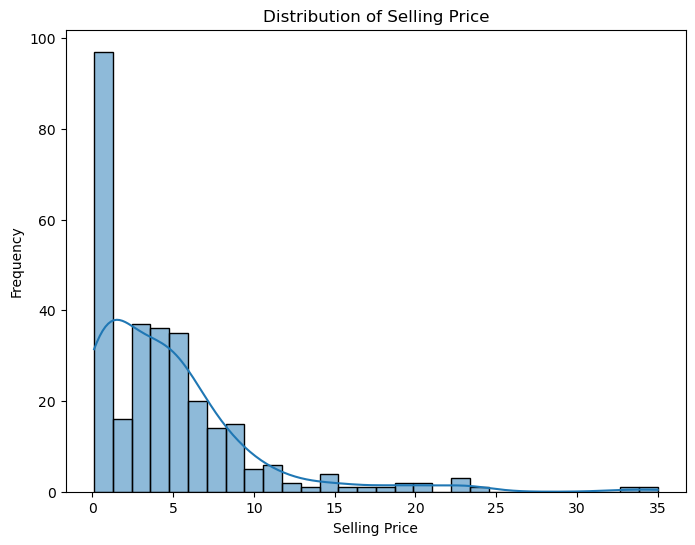

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Selling_Price'], bins=30, kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show() 

C:\Users\Hp\anaconda1\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


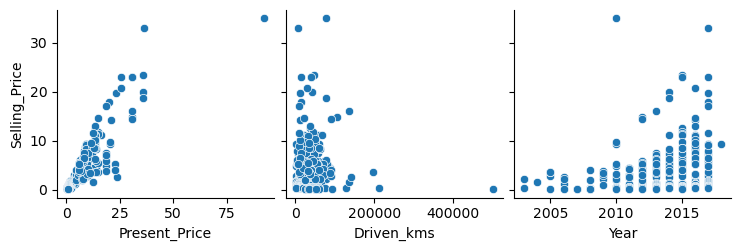

In [26]:
sns.pairplot(data, x_vars=['Present_Price', 'Driven_kms', 'Year'], y_vars='Selling_Price')
plt.show()

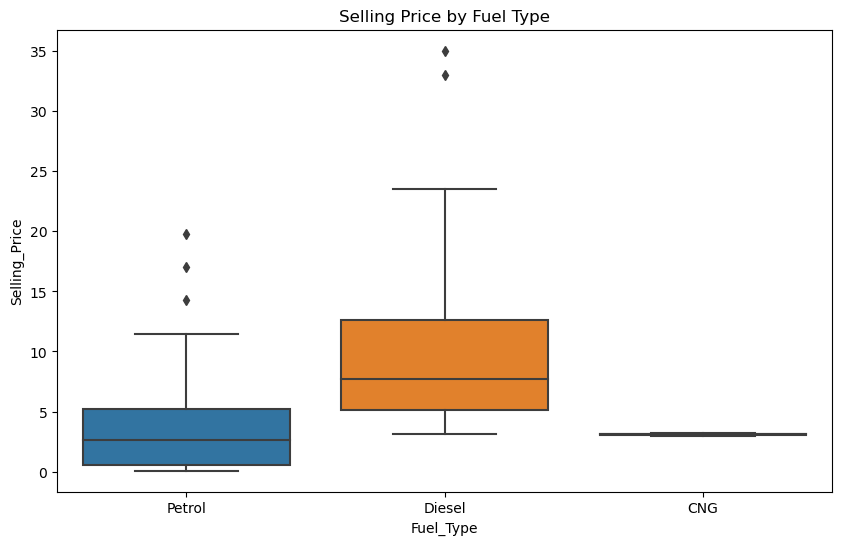

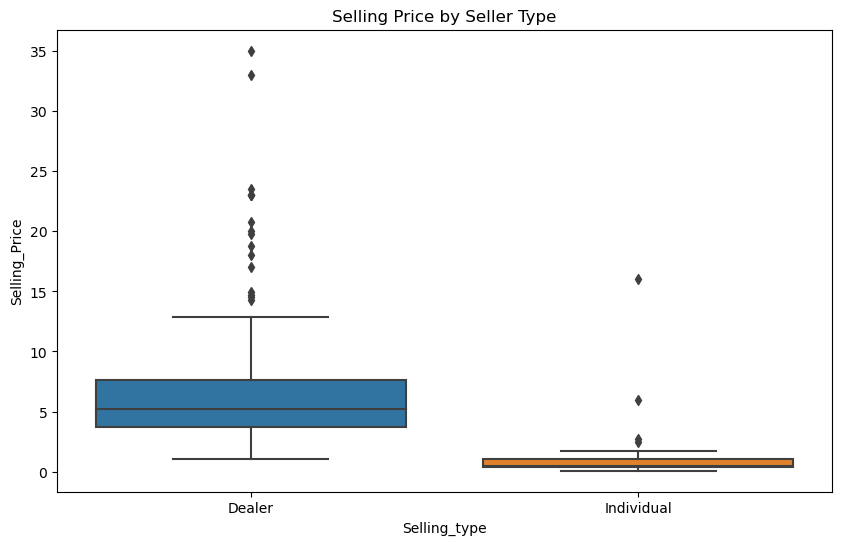

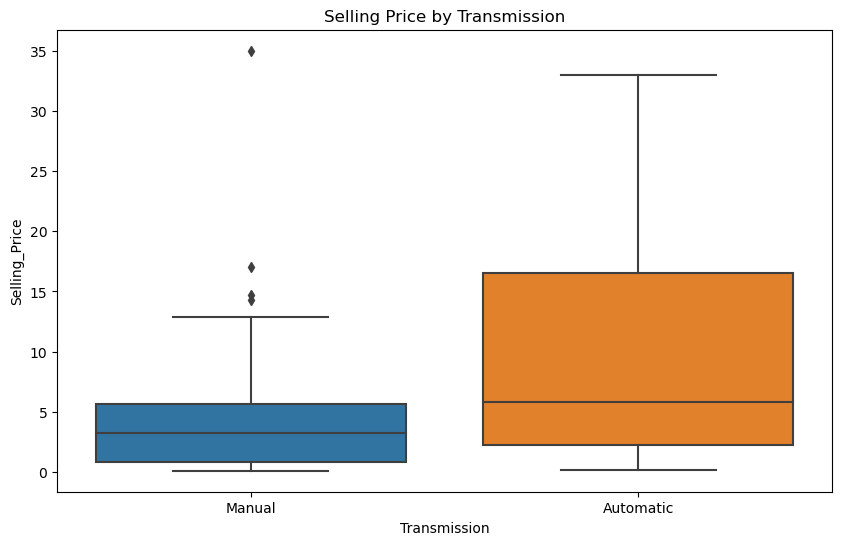

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=data)
plt.title('Selling Price by Fuel Type')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Selling_type', y='Selling_Price', data=data)
plt.title('Selling Price by Seller Type')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Selling_Price', data=data)
plt.title('Selling Price by Transmission')
plt.show()

In [32]:
data['Car_age']=2024-data['Year']
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [33]:
X = data[['Present_Price', 'Driven_kms', 'Car_age', 'Fuel_Type', 'Selling_type', 'Transmission']]
y = data['Selling_Price']

X = pd.get_dummies(X, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# <p>Using linear regression<p/>

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

LinearRegression()

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.3624587192326825
R-squared: 0.8540319775141388


# <p>Using Random forest

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

rf_model = RandomForestRegressor(random_state=42)

In [ ]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

In [42]:
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

y_pred = best_rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}") 

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error: 0.8878945195232609
R-squared: 0.961455524658331


# <h2>Inference</h2>
<p>The analysis compared two different methods for predicting used car prices:Linear Regression and Random Forest.
The results showed that the Random Forest model provided more accurate predictions. This suggests that the relationships between factors influencing car prices are likely more complex than a simple linear relationship. The Random Forest model, which considers multiple factors and their interactions in a more sophisticated way, was better able to capture these complexities and produce more accurate price estimates.The higher R-squared (0.96145) and lower Mean Squared Error (0.887) of the Random Forest model further support its superior predictive performance compared to Linear Regression in this context.</p>